In [1]:
#Importing data handling libraries
import os
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the file into pandas dataframe
df = pd.read_csv(r'C:\Users\Admin\Downloads\itineraries.csv')
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isNonStop,baseFare,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsEquipmentDescription,segmentsDistance
0,9ca0e81111c683bec1012473feefd28f,4/16/2022,4/17/2022,ATL,BOS,PT2H29M,0,True,217.67,248.6,947.0,2022-04-17T12:57:00.000-04:00,2022-04-17T15:26:00.000-04:00,Delta,Airbus A321,947
1,98685953630e772a098941b71906592b,4/16/2022,4/17/2022,ATL,BOS,PT2H30M,0,True,217.67,248.6,947.0,2022-04-17T06:30:00.000-04:00,2022-04-17T09:00:00.000-04:00,Delta,Airbus A321,947
2,98d90cbc32bfbb05c2fc32897c7c1087,4/16/2022,4/17/2022,ATL,BOS,PT2H30M,0,True,217.67,248.6,947.0,2022-04-17T11:35:00.000-04:00,2022-04-17T14:05:00.000-04:00,Delta,Boeing 757-200,947
3,969a269d38eae583f455486fa90877b4,4/16/2022,4/17/2022,ATL,BOS,PT2H32M,0,True,217.67,248.6,947.0,2022-04-17T13:59:00.000-04:00,2022-04-17T16:31:00.000-04:00,Delta,Airbus A321,947
4,980370cf27c89b40d2833a1d5afc9751,4/16/2022,4/17/2022,ATL,BOS,PT2H34M,0,True,217.67,248.6,947.0,2022-04-17T09:59:00.000-04:00,2022-04-17T12:33:00.000-04:00,Delta,Airbus A321,947


In [3]:
#Handling missing values
df.fillna(0, inplace = True)

In [4]:
#Understanding the datatypes to convert it if necessary
df.dtypes

legId                            object
searchDate                       object
flightDate                       object
startingAirport                  object
destinationAirport               object
travelDuration                   object
elapsedDays                       int64
isNonStop                          bool
baseFare                        float64
totalFare                       float64
totalTravelDistance             float64
segmentsDepartureTimeRaw         object
segmentsArrivalTimeRaw           object
segmentsAirlineName              object
segmentsEquipmentDescription     object
segmentsDistance                 object
dtype: object

In [5]:
#Calculating mean and Std
df.describe()

,elapsedDays,baseFare,totalFare,totalTravelDistance
count,1.048063e+06,1.048063e+06,1.048063e+06,1.048063e+06
mean,1.466582e-01,3.012527e+02,3.494301e+02,1.480787e+03
std,3.537704e-01,2.195205e+02,2.356638e+02,8.950039e+02
min,0.000000e+00,5.100000e+00,2.397000e+01,0.000000e+00
25%,0.000000e+00,1.618600e+02,1.986000e+02,7.620000e+02
50%,0.000000e+00,2.641900e+02,3.086000e+02,1.358000e+03
75%,0.000000e+00,3.925500e+02,4.471000e+02,2.308000e+03
max,2.000000e+00,3.531160e+03,3.810600e+03,3.958000e+03


In [6]:
#Since the searchDate, flightDate, travelDuration are in object format, we need to convert it
df['searchDate'] = pd.to_datetime(df['searchDate'])
df['flightDate'] = pd.to_datetime(df['flightDate'])

In [7]:
df.dtypes

legId                                   object
searchDate                      datetime64[ns]
flightDate                      datetime64[ns]
startingAirport                         object
destinationAirport                      object
travelDuration                          object
elapsedDays                              int64
isNonStop                                 bool
baseFare                               float64
totalFare                              float64
totalTravelDistance                    float64
segmentsDepartureTimeRaw                object
segmentsArrivalTimeRaw                  object
segmentsAirlineName                     object
segmentsEquipmentDescription            object
segmentsDistance                        object
dtype: object

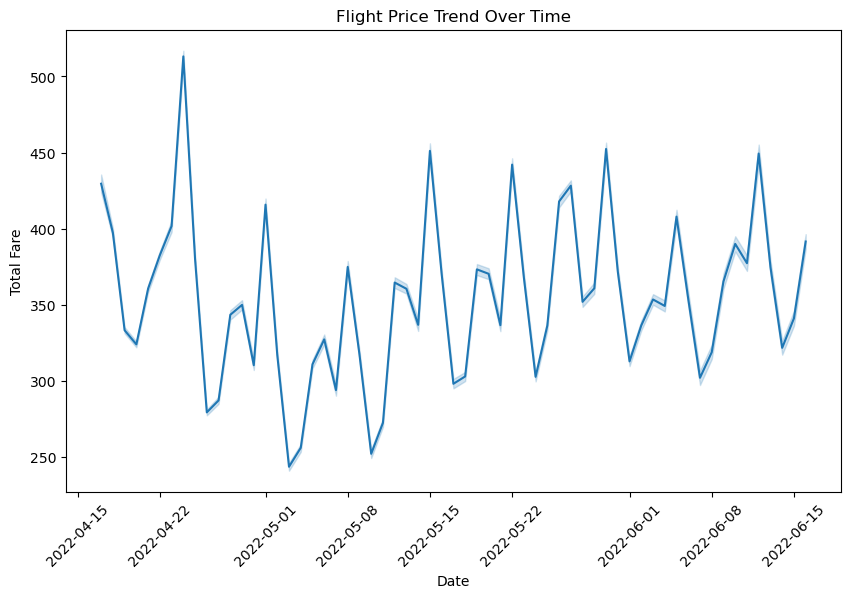

In [8]:
#Analyzing flight price trends over time
#Using line plot to analyze flight price trends over time
plt.figure(figsize= (10,6))
sns.lineplot(x ='flightDate', y = 'totalFare', data = df)
plt.title('Flight Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.show()

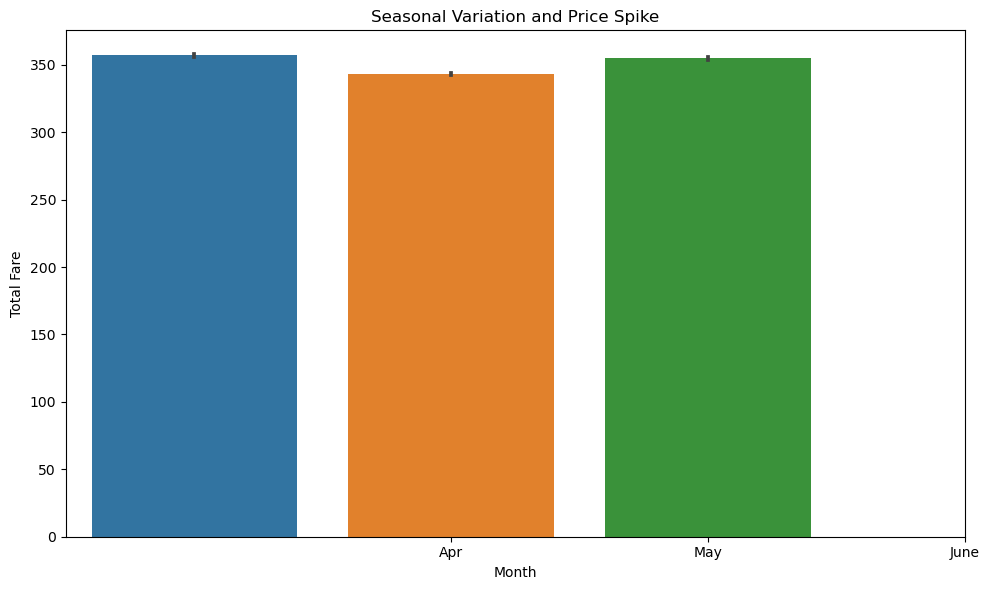

In [9]:
# Filter the DataFrame to include only data for January, April, and July
three_months_df = df[(df['flightDate'].dt.month == 4) | (df['flightDate'].dt.month == 5) | (df['flightDate'].dt.month == 6)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=three_months_df['flightDate'].dt.month, y='totalFare', data=three_months_df)
plt.title('Seasonal Variation and Price Spike')
plt.xlabel('Month')
plt.ylabel('Total Fare')
plt.xticks(ticks=[1, 2, 3], labels=['Apr', 'May', 'June'])  # Adjust labels for the three months
plt.tight_layout()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#Splitting data into training and testing sets
train_size = int(len(df)* 0.8)
train_data = df[:train_size]['totalFare']
test_data = df[train_size:]['totalFare']

#Fit ARIMA Model
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

#Forecasting
forecast_value = model_fit.forecast(steps=len(test_data))
#Calculating RMSE
rmse = sqrt(mean_squared_error(test_data, forecast_value))
print('RMSE:', rmse)

RMSE: 338.46190197302616


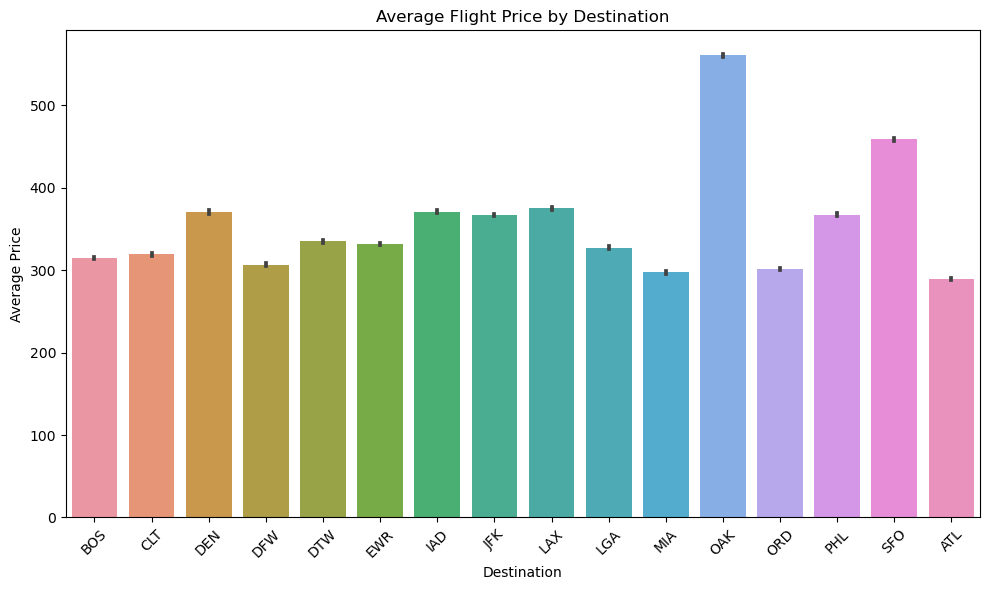

In [11]:
#Factors influencing flight prices
#Average price by destination
plt.figure(figsize = (10,6))
sns.barplot(x ='destinationAirport', y='totalFare', data = df)
plt.title('Average Flight Price by Destination')
plt.xlabel('Destination')
plt.ylabel('Average Price')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

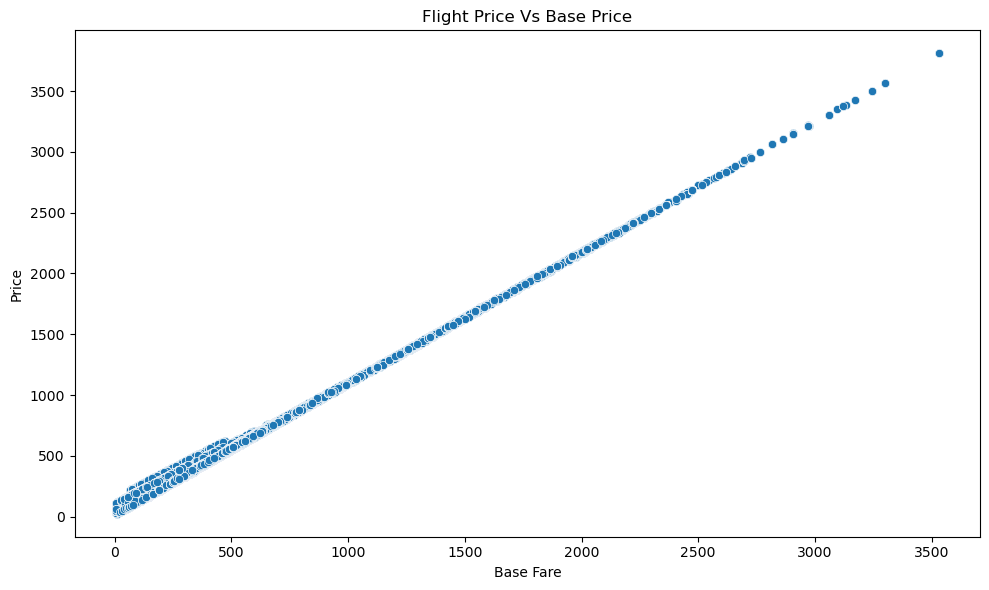

In [12]:
#Prices
plt.figure(figsize=(10,6))
sns.scatterplot(x ='baseFare', y='totalFare', data = df)
plt.title('Flight Price Vs Base Price')
plt.xlabel('Base Fare')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

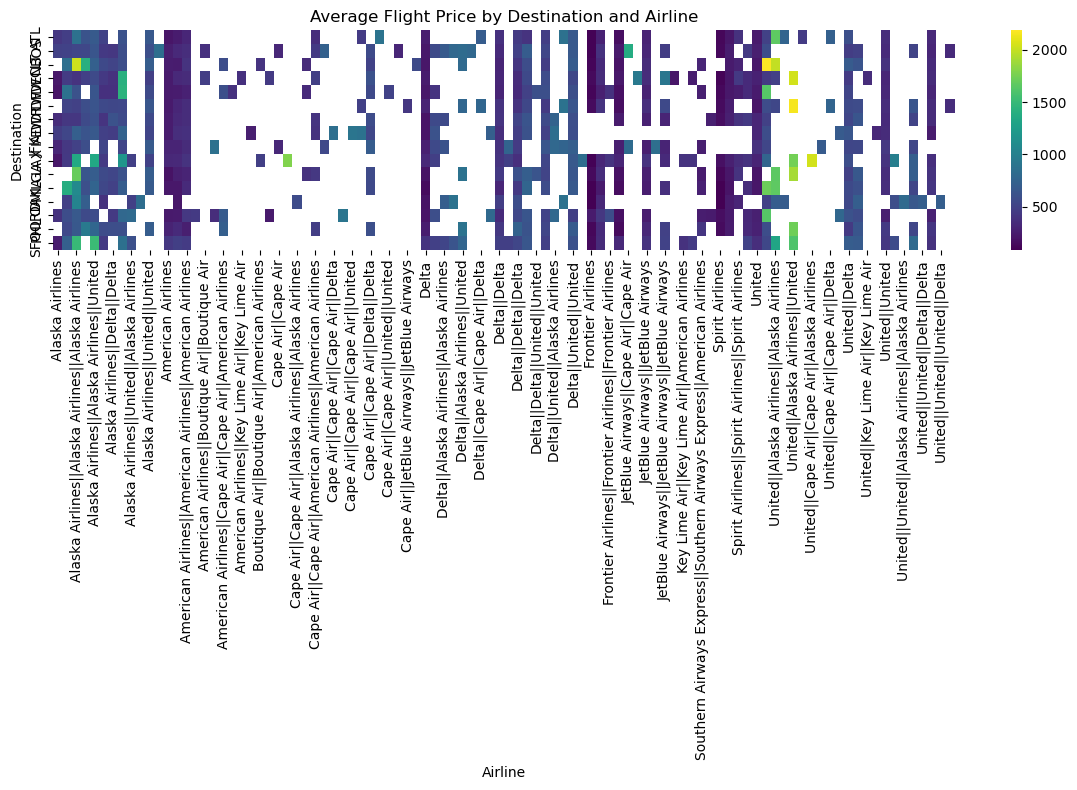

In [13]:
#Average Price by Destination and Airline
plt.figure(figsize = (12,8))
heatmap_data = df.pivot_table(index='destinationAirport', columns='segmentsAirlineName', values='totalFare', aggfunc='mean')
sns.heatmap(heatmap_data, cmap = 'viridis')
plt.title('Average Flight Price by Destination and Airline')
plt.xlabel('Airline')
plt.ylabel('Destination')
plt.tight_layout()
plt.show()

In [14]:
#Comparing flight price across different groups
from scipy.stats import f_oneway
airline_groups = []
for airline, group_df in df.groupby('segmentsAirlineName'):
    airline_groups.append(group_df['totalFare'])
    
#Perform Anova
f_statistic, p_value = f_oneway(*airline_groups)
print('F-statistic:', f_statistic)
print('P-Value:', p_value)

if p_value < 0.05:
    print('There is statistically significant difference between means of flight prices across different airlines.')
else:
    print('There are no statistically significant differences between the means of flight prices across different airlines.')

F-statistic: 5534.845851619546
P-Value: 0.0
There is statistically significant difference between means of flight prices across different airlines.


In [15]:
from IPython.display import Markdown
#Summary of Findings and Insights
summary = """
## Flight Price Analysis and Forecasting Report

### Findings and Insights:
1. Flight Price Trends Over Time:
The line plot shows the fluctuation of flight prices over time, indicating potential seasonal variations or trends.
There appears to be a noticeable spike in prices during certain months, as shown in the bar plot, suggesting seasonal variations.

2. ARIMA Forecasting:
The ARIMA model was utilized to forecast flight prices.
The Root Mean Square Error (RMSE) was calculated to evaluate the accuracy of the forecast.

3. Factors Influencing Flight Prices:
Destination Influence: Average flight prices vary significantly depending on the destination, as illustrated in the bar plot.
Base Fare Influence: There is a correlation between the base fare and the total fare, as depicted in the scatter plot.
Destination-Airline Interaction: The heatmap showcases how the average flight prices are influenced by both the destination and the airline.

4. Comparison Across Airlines:
An ANOVA test was conducted to compare flight prices across different airlines.
The results indicate whether there are statistically significant differences in mean flight prices among various airlines.

### Significance of Understanding flight price patterns offers several benefits for travelers:

1.Cost Optimization: By analyzing trends and seasonal variations, travelers can identify periods when flight prices are typically lower, enabling them to plan and book their trips strategically to save money.

2.Destination Selection: Knowledge of how flight prices vary based on destination allows travelers to make informed decisions when choosing their travel destinations, considering both budget and preferences.

3.Airline Selection: Comparing flight prices across different airlines enables travelers to select the most cost-effective option without compromising on quality or service.

4.Forecasting: Forecasting future flight prices using models like ARIMA helps travelers anticipate potential fluctuations and make timely booking decisions to secure the best deals.

In essence, understanding flight price patterns empowers travelers to make informed decisions, optimize costs, and enhance their overall travel experience.
"""
Markdown(summary)


## Flight Price Analysis and Forecasting Report

### Findings and Insights:
1. Flight Price Trends Over Time:
The line plot shows the fluctuation of flight prices over time, indicating potential seasonal variations or trends.
There appears to be a noticeable spike in prices during certain months, as shown in the bar plot, suggesting seasonal variations.

2. ARIMA Forecasting:
The ARIMA model was utilized to forecast flight prices.
The Root Mean Square Error (RMSE) was calculated to evaluate the accuracy of the forecast.

3. Factors Influencing Flight Prices:
Destination Influence: Average flight prices vary significantly depending on the destination, as illustrated in the bar plot.
Base Fare Influence: There is a correlation between the base fare and the total fare, as depicted in the scatter plot.
Destination-Airline Interaction: The heatmap showcases how the average flight prices are influenced by both the destination and the airline.

4. Comparison Across Airlines:
An ANOVA test was conducted to compare flight prices across different airlines.
The results indicate whether there are statistically significant differences in mean flight prices among various airlines.

### Significance of Understanding flight price patterns offers several benefits for travelers:

1.Cost Optimization: By analyzing trends and seasonal variations, travelers can identify periods when flight prices are typically lower, enabling them to plan and book their trips strategically to save money.

2.Destination Selection: Knowledge of how flight prices vary based on destination allows travelers to make informed decisions when choosing their travel destinations, considering both budget and preferences.

3.Airline Selection: Comparing flight prices across different airlines enables travelers to select the most cost-effective option without compromising on quality or service.

4.Forecasting: Forecasting future flight prices using models like ARIMA helps travelers anticipate potential fluctuations and make timely booking decisions to secure the best deals.

In essence, understanding flight price patterns empowers travelers to make informed decisions, optimize costs, and enhance their overall travel experience.
